In [1]:
# Packages and dependencies
from ipywidgets import *
import pandas as pd
import glob
import numpy as np
import os
import re
import json
import requests
import csv
import requests
from io import StringIO 
import gzip

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import pandas as pd

In [17]:
enc = pd.read_csv('/Users/Carol/Desktop/arquivoNovo/encode_final_cleaned.csv')
enc = enc.drop(['zscore15dn','zscore15up','zscore15total'],axis=1)
enc.head()

,Unnamed: 0,description,TF,cell,gene,organism,Encode,CreedsDN,pval16DN,Overlap16DN,...,pval16BFdn,pval16FDRdn,lg10up15,lg10dn15,pval15BFup,pval15FDRup,pval15BFdn,pval15FDRdn,lg10dn16,lg10up16
0,1,ARID3A_HepG2_1337_hg19,ARID3A,HepG2,1337,hg19,2000,305,1.0,0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,2,ARID3A_HepG2_1338_hg19,ARID3A,HepG2,1338,hg19,2000,352,1.0,0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,3,ARID3A_HepG2_1339_hg19,ARID3A,HepG2,1339,hg19,2000,301,1.0,0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,4,ARID3A_K562_1337_hg19,ARID3A,K562,1337,hg19,2000,305,1.0,0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,5,ARID3A_K562_1338_hg19,ARID3A,K562,1338,hg19,2000,352,1.0,0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [5]:
#enc.describe()

# ENCODE 2015

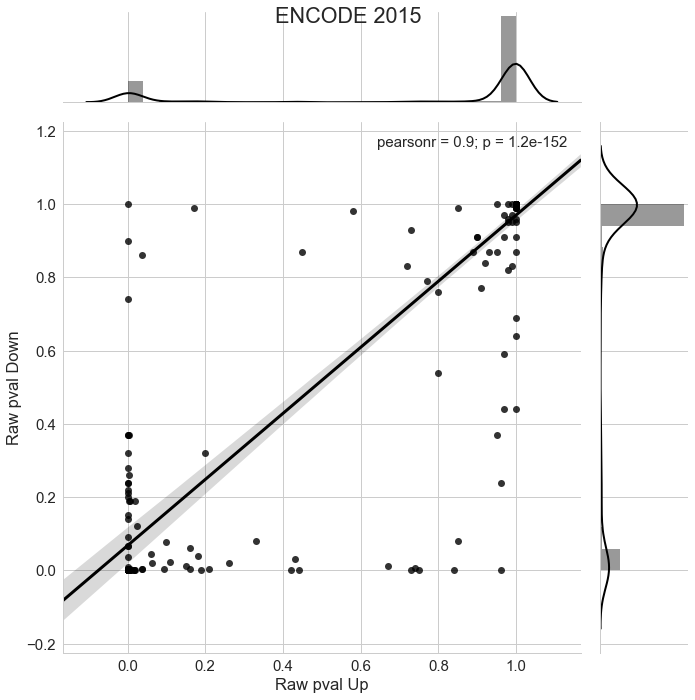

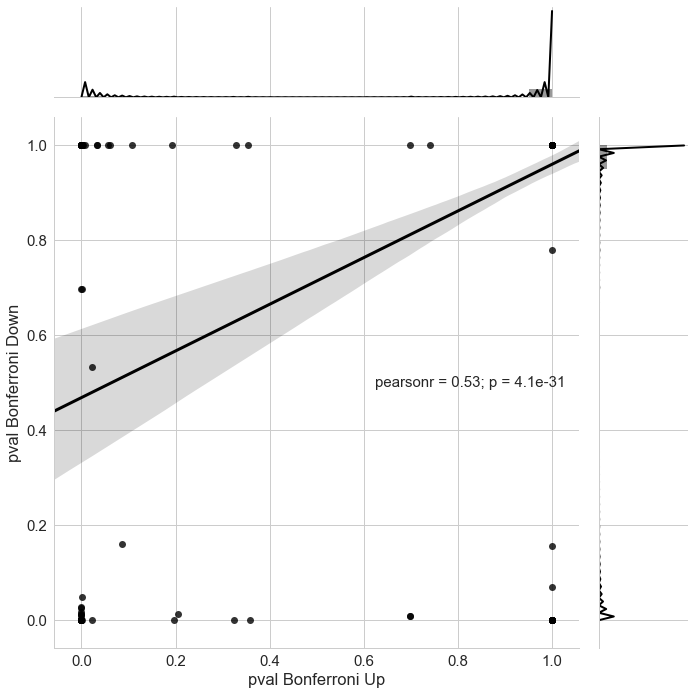

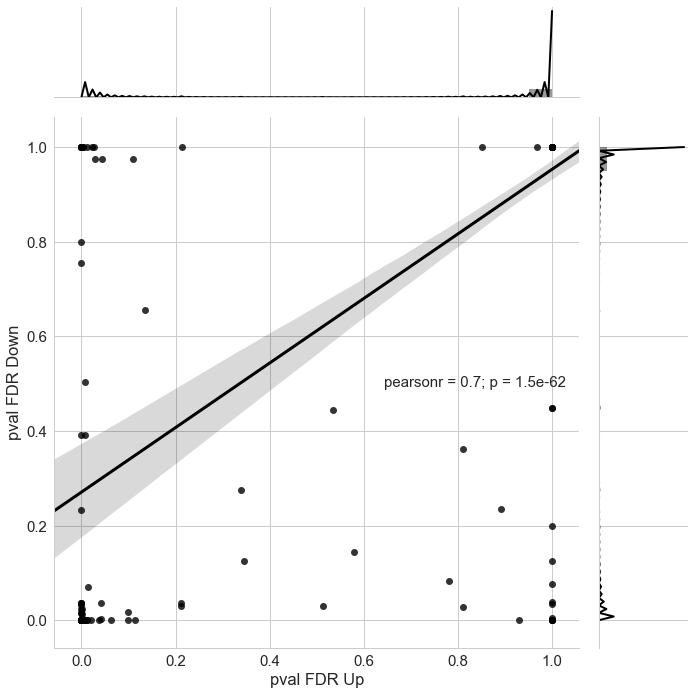

In [6]:
#fig, axs = plt.subplots(1,2)

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_style("whitegrid")

sns.jointplot('pval15UP', 'pval15DN', data=enc, kind="reg", color='k', size=10 ,) 
plt.xlabel("Raw pval Up")
plt.ylabel("Raw pval Down") 
sns.plt.suptitle('ENCODE 2015')
plt.tight_layout()


sns.jointplot('pval15BFup', 'pval15BFdn', data=enc, kind="reg",color=
             'k', size=10,  ) 
plt.xlabel("pval Bonferroni Up")
plt.ylabel("pval Bonferroni Down") 
plt.tight_layout()


sns.jointplot('pval15FDRup', 'pval15FDRdn', data=enc, kind="reg",color=
             'k',size=10, ) 
plt.xlabel("pval FDR Up")
plt.ylabel("pval FDR Down") 
plt.tight_layout()


In [8]:
#plt.style.available

# ENCODE 2016

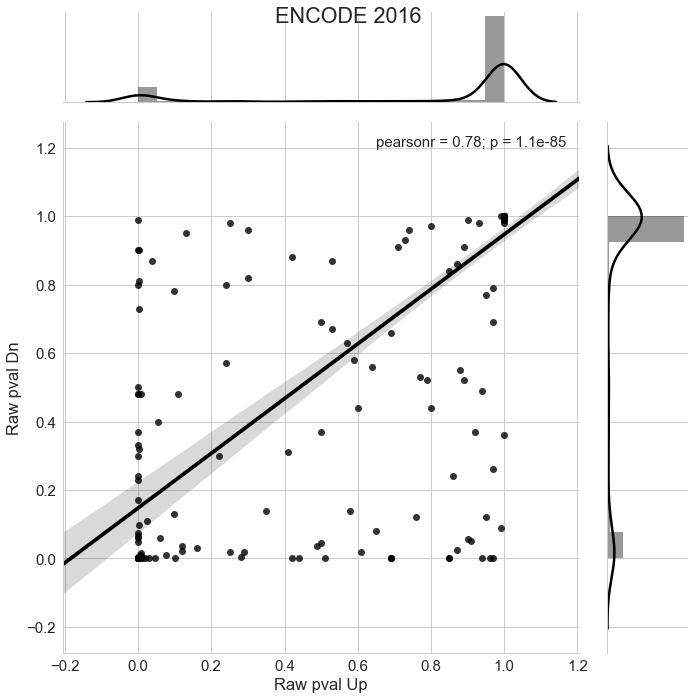

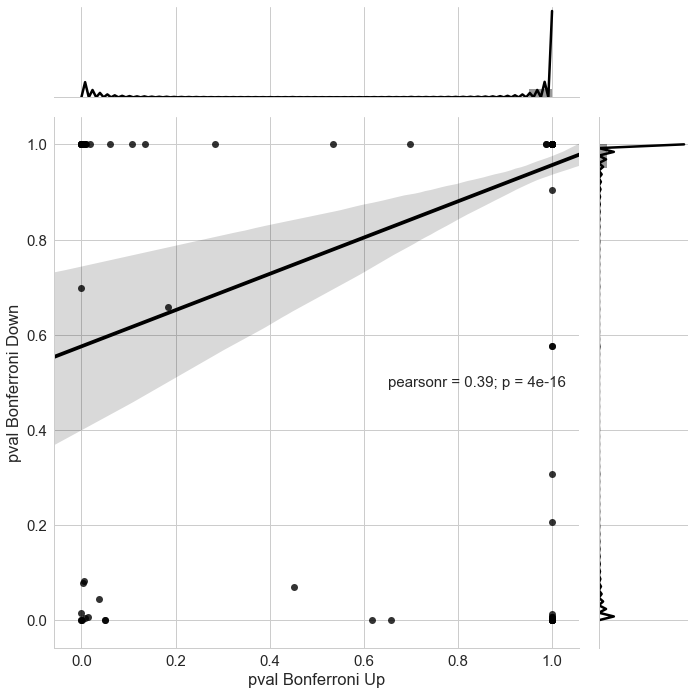

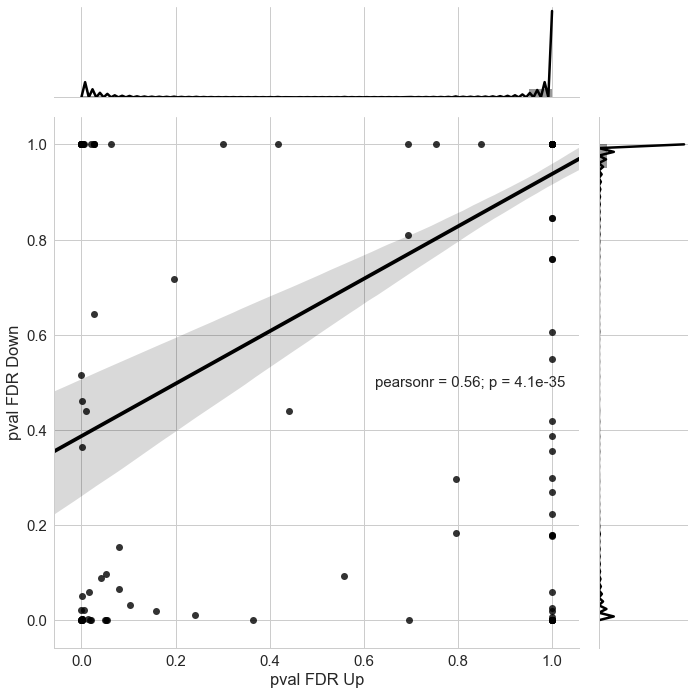

In [9]:
#fig, axs = plt.subplots(1,2)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

sns.jointplot('pval16UP', 'pval16DN', data=enc, kind="reg", color=
             'k', size=10 ) 
plt.xlabel("Raw pval Up")
plt.ylabel("Raw pval Dn") 
sns.plt.suptitle('ENCODE 2016')
plt.tight_layout()

sns.jointplot('pval16BFup', 'pval16BFdn', data=enc, kind="reg",color=
             'k', size=10,  ) 
plt.xlabel("pval Bonferroni Up")
plt.ylabel("pval Bonferroni Down") 
plt.tight_layout()

sns.jointplot('pval16FDRup', 'pval16FDRdn', data=enc, kind="reg",color=
             'k',size=10, ) 
plt.xlabel("pval FDR Up")
plt.ylabel("pval FDR Down") 
plt.tight_layout()

# ChEA

In [8]:
chea = pd.read_csv("/Users/CArol/Desktop/arquivoNovo/chea_clean.csv")
#chea.head()

,Unnamed: 0,X,listAup,ListBup,overlapUP,pvalueUP,X.1,listAdn,ListBdn,overlapDN,pvaldn,overlapTotal,pvalBFup,pvalBFdn,pvalFDRup,pvalFDRdn,lg10up,lg10dn
0,1,"AR_1,creeds15gene_2194",300,351,11,9.100000e-03,"AR_1,creeds15$gene_2194",300,247,17,5.600000e-08,28,1.000000e+00,1.007440e-04,8.024951e-02,1.831709e-06,-2.040959,-7.251812
1,2,"E2F1_5,creeds15gene_1129",4174,350,172,8.600000e-38,"E2F1_5,creeds15$gene_1129",4174,251,118,3.500000e-24,290,1.547140e-34,6.296500e-21,7.735700e-35,6.996111e-22,-37.065502,-23.455932
2,3,"MYC_10,creeds15gene_712",3870,228,52,2.600000e-02,"MYC_10,creeds15$gene_712",3870,371,218,7.600000e-72,270,1.000000e+00,1.367240e-68,1.948917e-01,1.367240e-68,-1.585027,-71.119186
3,4,"E2F1_5,creeds15gene_998",4174,304,133,2.000000e-23,"E2F1_5,creeds15$gene_998",4174,298,121,3.000000e-18,254,3.598000e-20,5.397000e-15,4.497500e-21,4.151538e-16,-22.698970,-17.522879
4,5,"HNF4A_2,creeds15gene_577",6085,346,146,3.400000e-09,"HNF4A_2,creeds15$gene_577",6085,255,107,5.500000e-07,253,6.116600e-06,9.894500e-04,2.265407e-07,1.522231e-05,-8.468521,-6.259637


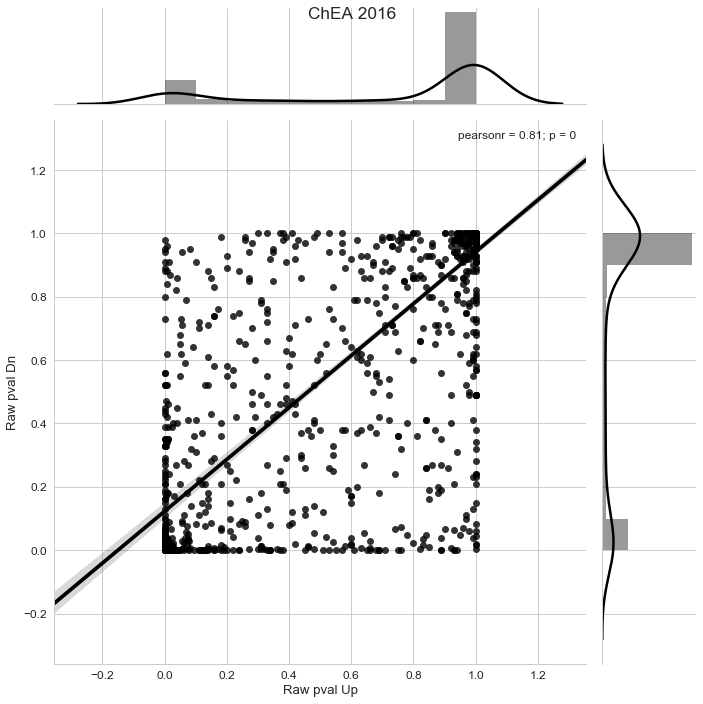

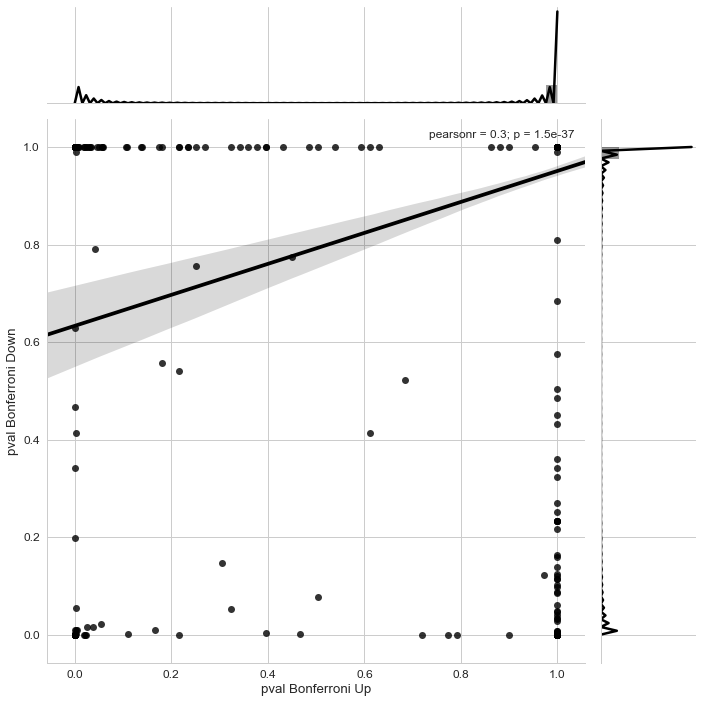

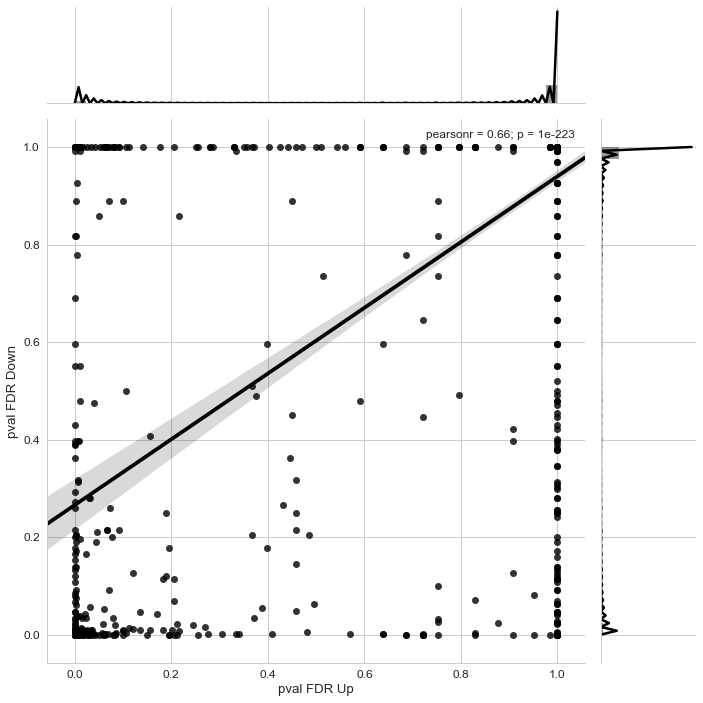

In [11]:
#fig, axs = plt.subplots(1,2)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

sns.jointplot('pvalueUP', 'pvaldn', data=chea, kind="reg", color='k', size=10) 
plt.xlabel("Raw pval Up")
plt.ylabel("Raw pval Dn") 
sns.plt.suptitle('ChEA 2016')
plt.tight_layout()

sns.jointplot('pvalBFup', 'pvalBFdn', data=chea, kind="reg",color='k', size=10,  ) 
plt.xlabel("pval Bonferroni Up")
plt.ylabel("pval Bonferroni Down") 
plt.tight_layout()

sns.jointplot('pvalFDRup', 'pvalFDRdn', data=chea, kind="reg",color=
             'k',size=10, ) 
plt.xlabel("pval FDR Up")
plt.ylabel("pval FDR Down") 
plt.tight_layout()